# Instacart Grocery Basket Analysis

### Script Contents

Step 1 - Data imports and initial checks <br>
Step 2 - Consider security implications  <br>
Step 3 - Add geographical regions <br>
Step 4 - Remove customers with less than 5 orders <br>
Step 5 - Additional customer profiling <br>
Step 6 - Customer profile visualization <br>
Step 7 - Summary statistics based on uage frequency and expenditure <br>
Step 8 - Customer profiles compared to regions and departments <br>
Step 9 - Visualizations for step 8 <br>

### Step 1 - Data imports and initial checks 

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
path = r'C:\Users\n4\Desktop\EX4.10 - Excel Reporting'

In [4]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared','cust_ords_prods_merged.pkl'))
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,firstname,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df.shape

(32404859, 32)

In [7]:
# double check for missing values
df.isna().sum()

# the values below were intentionally imputted as NA during the data consistency check phase to reduce the outlier prices. 

order_id                           0
user_id                            0
order_number                       0
order_dow                          0
order_hour_of_day                  0
days_since_prior_order             0
product_id                         0
add_to_cart_order                  0
reordered                          0
product_name                       0
aisle_id                           0
department_id                      0
prices                          5127
price_range_loc                    0
busiest_days                       0
busiest_period_of_day              0
max_order                          0
loyalty_flag                       0
avg_spend_per_user                 0
high_spenders                      0
median_days_since_prior_ords       0
frequent_user                      0
firstname                          0
surname                            0
gender                             0
state                              0
age                                0
d

### Step 2 - Consider security implications

In [7]:
df.drop(columns = ['firstname', 'surname','date_joined'], inplace = True)

In [8]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spend_per_user', 'high_spenders',
       'median_days_since_prior_ords', 'frequent_user', 'gender', 'state',
       'age', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

I dropped columns that can unique identify customers. The "scrub" option was chosen since stakeholders cannot be contacted for calrification. 

Columns that will be scrubbed are firstname, lastname, and datejoined

### Step 3 - Add geographical regions

#### Step 3a

In [8]:
df['state'].unique()

array(['Alabama', 'Indiana', 'Louisiana', 'Montana', 'Oklahoma',
       'Tennessee', 'Iowa', 'Ohio', 'Virginia', 'Connecticut', 'Kentucky',
       'Oregon', 'South Dakota', 'Michigan', 'New Jersey', 'Arizona',
       'Maine', 'Hawaii', 'Minnesota', 'Illinois', 'Idaho', 'Kansas',
       'North Carolina', 'Vermont', 'Alaska', 'Delaware', 'Maryland',
       'Nebraska', 'Nevada', 'Arkansas', 'Georgia',
       'District of Columbia', 'Utah', 'Colorado', 'Florida',
       'South Carolina', 'Rhode Island', 'Washington', 'California',
       'Mississippi', 'Texas', 'New Mexico', 'Missouri', 'Wyoming',
       'New Hampshire', 'Massachusetts', 'Pennsylvania', 'Wisconsin',
       'West Virginia', 'North Dakota', 'New York'], dtype=object)

In [9]:
# Data source: Kaggle.com - https://www.kaggle.com/omer2040/usa-states-to-region
# Double-checked using wikipedia.org - https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

cols = ['State','Region']

df_region = pd.read_csv(os.path.join(path, '02 Data','Original','states.csv'), usecols = cols)

df_region.sort_values(by = 'Region')

,State,Region
28,North Dakota,Midwest
35,Ohio,Midwest
15,Indiana,Midwest
48,Wisconsin,Midwest
41,South Dakota,Midwest
14,Illinois,Midwest
29,Nebraska,Midwest
16,Kansas,Midwest
24,Missouri,Midwest
23,Minnesota,Midwest


In [10]:
# Rename columns for upcoming merge

df_region.rename(columns = {'State':'state','Region':'region'}, inplace = True)

df_region.head(2)

,state,region
0,Alaska,West
1,Alabama,South


In [11]:
#Drop previous merge indicator column

df = df.drop(columns = ['_merge'])

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spend_per_user', 'high_spenders',
       'median_days_since_prior_ords', 'frequent_user', 'firstname', 'surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income'],
      dtype='object')

In [12]:
# merge regional dataset and customer order dataset
df_merged = df.merge(df_region, on = 'state', how = 'inner', indicator = True)

df_merged.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,both


In [13]:
df_merged['_merge'].value_counts(dropna = False)

both          32404859
right_only           0
left_only            0
Name: _merge, dtype: int64

In [14]:
df_merged.shape

(32404859, 33)

#### Step 3b

In [ ]:
crosstab = pd.crosstab(df_merged['region'], df_merged['high_spenders'], dropna = False)

In [16]:
crosstab

high_spenders,High spender,Low spender
region,,
Midwest,155946,7441379
Northeast,108218,5614518
South,209637,10582248
West,160316,8132597


<AxesSubplot:xlabel='region'>

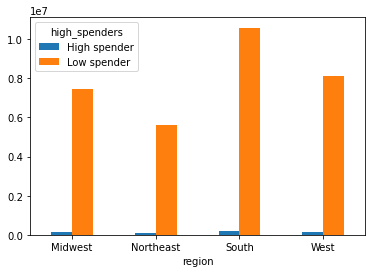

In [17]:
crosstab.plot.bar(rot = 0)

The south region has the largest numbers of low spenders, followed by the west region. 

### Step 4 - Remove customers with less than 5 orders

In [18]:
df_merged_s4 = df_merged.loc[df_merged['order_number'] >= 5]

df_merged_s4['order_number'].value_counts(dropna = False)

5     1626901
6     1470894
7     1332635
8     1218047
9     1119491
       ...   
95      14516
96      13737
97      13356
98      12851
99      12421
Name: order_number, Length: 95, dtype: int64

In [19]:
df_merged_s4.shape

(24414877, 33)

In [20]:
df_merged_s4.to_pickle(os.path.join(path,'02 Data', 'Prepared','cus_ords_over_5.pkl'))

### Step 5 - Additional customer profiling

In [21]:
#Load tranformed departments dataset created in the data wrangling stage to use the corresponding department name
# in the subsequent data visualizations.

departments = pd.read_csv(os.path.join(path,'02 Data','Prepared','departments_transformed.csv'))

departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [22]:
#Drop previous merge indicator column

df_merged_s4 = df_merged_s4.drop(columns = ['_merge'])

df_merged_s4.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spend_per_user', 'high_spenders',
       'median_days_since_prior_ords', 'frequent_user', 'firstname', 'surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'region'],
      dtype='object')

In [23]:
df_merged_s4 = df_merged_s4.merge(departments, on = 'department_id', how = 'inner', indicator = True)
df_merged_s4.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spend_per_user', 'high_spenders',
       'median_days_since_prior_ords', 'frequent_user', 'firstname', 'surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'region', 'department', '_merge'],
      dtype='object')

In [24]:
df_merged_s4['_merge'].value_counts(dropna = False)

both          24414877
right_only           0
left_only            0
Name: _merge, dtype: int64

In [25]:
# Begin customer profiling

In [50]:
df_merged_s4['fam_status'].value_counts()

married                             17138476
single                               4015790
divorced/widowed                     2089212
living with parents and siblings     1171399
Name: fam_status, dtype: int64

In [25]:
round(df_merged_s4['income'].describe())

count    24414877.0
mean        99895.0
std         43334.0
min         25903.0
25%         67524.0
50%         96836.0
75%        128160.0
max        593901.0
Name: income, dtype: float64

In [26]:
# Income Profile 1

df_merged_s4.loc[(df_merged_s4['income'] <= 60000), 'income_levels'] = 'low income'

df_merged_s4.loc[(df_merged_s4['income'] > 60000) &
                (df_merged_s4['income'] <= 90000),'income_levels'] = 'middle income'

df_merged_s4.loc[(df_merged_s4['income'] > 90000),'income_levels'] = 'high income'

In [27]:
df_merged_s4['income_levels'].value_counts(dropna = False)

high income      14093355
middle income     5806070
low income        4515452
Name: income_levels, dtype: int64

In [28]:
df_merged_s4.shape

(24414877, 35)

In [4]:
# Age group profile 2
df_merged_s4.loc[(df_merged_s4['age'] < 40), 'age_group'] = 'Young Adult'

df_merged_s4.loc[(df_merged_s4['age'] >= 40) &
                (df_merged_s4['age'] < 60),'age_group'] = 'Middle Adult'

df_merged_s4.loc[(df_merged_s4['age'] >= 60),'age_group'] = 'Senior Adult'


df_merged_s4['age_group'].value_counts(dropna = False)

Young Adult     8418975
Senior Adult    8330598
Middle Adult    7665304
Name: age_group, dtype: int64

In [30]:
df_merged_s4.shape

(24414877, 36)

In [31]:
# Median time of day for each user. Profile 3

df_merged_s4['avg_time_per_user'] = df_merged_s4.groupby('user_id')['order_hour_of_day'].transform(np.median)

df_merged_s4.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,region,department,_merge,income_levels,age_group,avg_time_per_user
0,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,beverages,both,low income,Young Adult,14.0
1,3367565,1,6,2,7,19.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,beverages,both,low income,Young Adult,14.0
2,550135,1,7,1,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,beverages,both,low income,Young Adult,14.0
3,3108588,1,8,1,14,14.0,196,2,1,Soda,...,2/17/2019,3,married,40423,South,beverages,both,low income,Young Adult,14.0
4,2295261,1,9,1,16,0.0,196,4,1,Soda,...,2/17/2019,3,married,40423,South,beverages,both,low income,Young Adult,14.0


In [32]:
# Median time of day for each user flag creation. Profile 4
df_merged_s4.loc[(df_merged_s4['avg_time_per_user'] < 11), 'customers_median_daytime'] = 'Morning Shopper'

df_merged_s4.loc[(df_merged_s4['avg_time_per_user'] >= 11) &
                 (df_merged_s4['avg_time_per_user'] < 15), 'customers_median_daytime'] = 'Mid-day Shopper'

df_merged_s4.loc[(df_merged_s4['avg_time_per_user'] >= 15) &
                 (df_merged_s4['avg_time_per_user'] < 19), 'customers_median_daytime'] = 'Afternoon Shopper'

df_merged_s4.loc[(df_merged_s4['avg_time_per_user'] >= 19), 'customers_median_daytime'] = 'Night-time Shopper'

df_merged_s4['customers_median_daytime'].value_counts(dropna = False)

Mid-day Shopper       13927692
Afternoon Shopper      6763691
Morning Shopper        3180942
Night-time Shopper      542552
Name: customers_median_daytime, dtype: int64

In [33]:
# Create flag for users with or without kids to create Profile 5

df_merged_s4.loc[(df_merged_s4['department_id'] == 18), 'kids_flag'] = 1
df_merged_s4.loc[np.logical_not((df_merged_s4['department_id'] == 18)), 'kids_flag'] = 0

df_merged_s4['kids_flag'].value_counts(dropna = False)

0.0    24078930
1.0      335947
Name: kids_flag, dtype: int64

In [34]:
df_merged_s4['kids_count'] = df_merged_s4.groupby('user_id')['kids_flag'].transform(np.sum)

In [35]:
df_merged_s4.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,region,department,_merge,income_levels,age_group,avg_time_per_user,customers_median_daytime,kids_flag,kids_count
0,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,South,beverages,both,low income,Young Adult,14.0,Mid-day Shopper,0.0,0.0
1,3367565,1,6,2,7,19.0,196,1,1,Soda,...,40423,South,beverages,both,low income,Young Adult,14.0,Mid-day Shopper,0.0,0.0
2,550135,1,7,1,9,20.0,196,1,1,Soda,...,40423,South,beverages,both,low income,Young Adult,14.0,Mid-day Shopper,0.0,0.0
3,3108588,1,8,1,14,14.0,196,2,1,Soda,...,40423,South,beverages,both,low income,Young Adult,14.0,Mid-day Shopper,0.0,0.0
4,2295261,1,9,1,16,0.0,196,4,1,Soda,...,40423,South,beverages,both,low income,Young Adult,14.0,Mid-day Shopper,0.0,0.0


In [59]:
# df_merged_s4[(df_merged_s4['kids_count'] == 1)]
# df_merged_s4[(df_merged_s4['user_id'] == '160202')]
# 42382

In [36]:
#Check the frequency of baby products counts 

df_merged_s4['kids_count'].value_counts(dropna = False)

0.0      16594684
1.0       1449554
2.0        761904
3.0        475266
4.0        405390
           ...   
245.0         569
200.0         537
156.0         499
219.0         499
236.0         474
Name: kids_count, Length: 256, dtype: int64

In [37]:
# Double check the values for famiy status
df_merged_s4['fam_status'].value_counts()

married                             17138476
single                               4015790
divorced/widowed                     2089212
living with parents and siblings     1171399
Name: fam_status, dtype: int64

In [43]:
# Single or couple with kids profile 5

df_merged_s4.loc[(df_merged_s4['fam_status'].isin(['divorced/widowed','single'])) &
                 (df_merged_s4['n_dependants'] >= 1) &
                 (df_merged_s4['kids_count'] >= 1), 'parental_status'] = 'single with kids'

df_merged_s4.loc[(df_merged_s4['fam_status'].isin(['divorced/widowed','single'])) &
                 (df_merged_s4['n_dependants'] == 0) &
                 (df_merged_s4['kids_count'] == 0), 'parental_status'] = 'single without kids'

df_merged_s4.loc[(df_merged_s4['fam_status'] == 'married') &
                 (df_merged_s4['n_dependants'] >= 1) &
                 (df_merged_s4['kids_count'] >= 1), 'parental_status'] = 'couple with kids'

df_merged_s4.loc[(df_merged_s4['fam_status'] == 'married') &
                 (df_merged_s4['kids_count'] < 1), 'parental_status'] = 'couple without kids'

df_merged_s4.loc[df_merged_s4['parental_status'].isna(),'parental_status'] = np.nan

In [44]:
df_merged_s4['parental_status'].value_counts(dropna = False)

couple without kids    11656347
couple with kids        5482129
single without kids     4135733
NaN                     3140668
Name: parental_status, dtype: int64

It's interesting to see no single customers with kids based on the criteria above.

In [46]:
# Double check the rows based on parental_status

df_merged_s4[['user_id','gender','fam_status','n_dependants','kids_count','kids_flag','age_group','parental_status']]

,user_id,gender,fam_status,n_dependants,kids_count,kids_flag,age_group,parental_status
0,1,Female,married,3,0.0,0.0,Young Adult,couple without kids
1,1,Female,married,3,0.0,0.0,Young Adult,couple without kids
2,1,Female,married,3,0.0,0.0,Young Adult,couple without kids
3,1,Female,married,3,0.0,0.0,Young Adult,couple without kids
4,1,Female,married,3,0.0,0.0,Young Adult,couple without kids
...,...,...,...,...,...,...,...,...
24414872,172917,Female,married,1,11.0,1.0,Senior Adult,couple with kids
24414873,172917,Female,married,1,11.0,1.0,Senior Adult,couple with kids
24414874,172917,Female,married,1,11.0,1.0,Senior Adult,couple with kids
24414875,172917,Female,married,1,11.0,1.0,Senior Adult,couple with kids


In [47]:
df_merged_s4.shape

(24414877, 42)

In [62]:
# drop flags that are not longer considered useful

df_merged_s4 = df_merged_s4.drop(columns = ['_merge','kids_flag'])

In [63]:
df_merged_s4.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spend_per_user', 'high_spenders',
       'median_days_since_prior_ords', 'frequent_user', 'firstname', 'surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'region', 'department', 'income_levels', 'age_group',
       'avg_time_per_user', 'customers_median_daytime', 'kids_count',
       'parental_status'],
      dtype='object')

In [64]:
#Export updated dataframe

df_merged_s4.to_pickle(os.path.join(path,'02 Data', 'Prepared','cus_ords_over_5.pkl'))

### Step 6 - Customer profile visualization 

In [3]:
# just in case - retrive saved file from step 5
# df_merged_s4 = pd.read_pickle(os.path.join(path,'02 Data','Prepared','cus_ords_over_5.pkl'))
# # df_merged_s4.shape

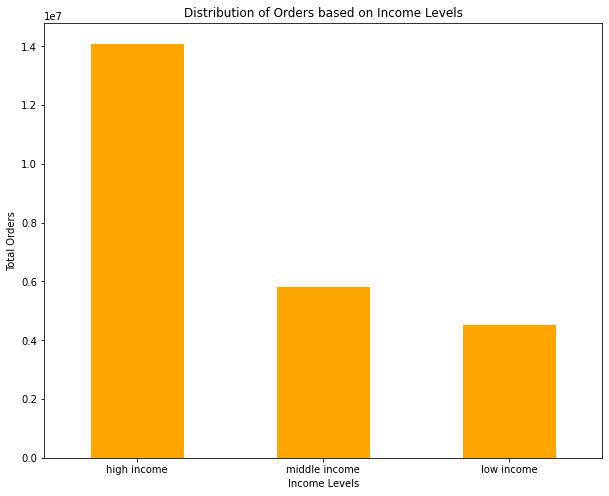

In [25]:
# orders from different income levels

fig_income = df_merged_s4['income_levels'].value_counts(dropna = False).plot.bar(color = 'orange', rot = 0,
                                                                    xlabel = 'Income Levels',
                                                                    ylabel = 'Total Orders',
                                                                    figsize = (10,8),
                                                                    title = "Distribution of Orders based on Income Levels")
plt.show()

In [33]:
df_merged_s4['age_group'].value_counts(dropna = False)

Young Adult     8418975
Senior Adult    8330598
Middle Adult    7665304
Name: age_group, dtype: int64

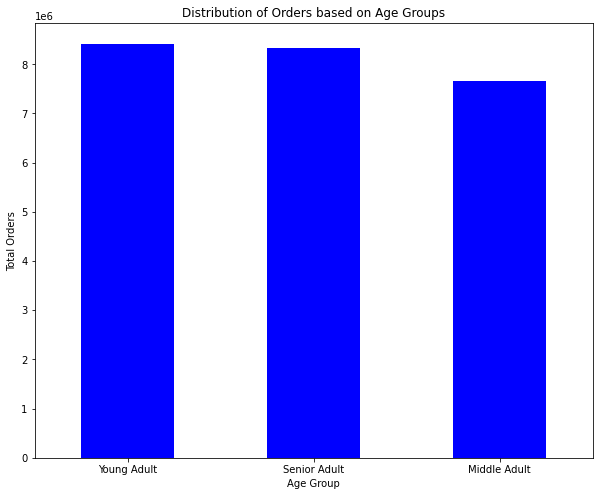

In [26]:
# orders from different age groups

fig_age = df_merged_s4['age_group'].value_counts(dropna = False).plot.bar(color = 'blue', rot = 0,
                                                                    xlabel = 'Age Group',
                                                                    ylabel = 'Total Orders',
                                                                    figsize = (10,8),
                                                                    title = "Distribution of Orders based on Age Groups")

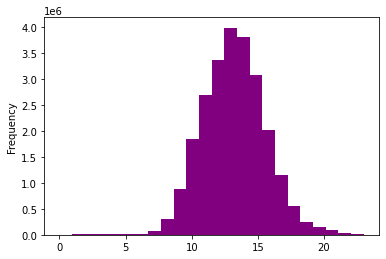

In [27]:
# Distribution of median hour of orders for each customer 

fig_median_orders = df_merged_s4['avg_time_per_user'].plot.hist(color = 'purple', bins = 24)

In [92]:
# Distribution of shoppers based on time of day
round(df_merged_s4.groupby(['customers_median_daytime']).agg({'prices':'median'})).sort_values(by = 'prices', ascending = False)

,prices
customers_median_daytime,
Afternoon Shopper,7.0
Mid-day Shopper,7.0
Morning Shopper,7.0
Night-time Shopper,7.0


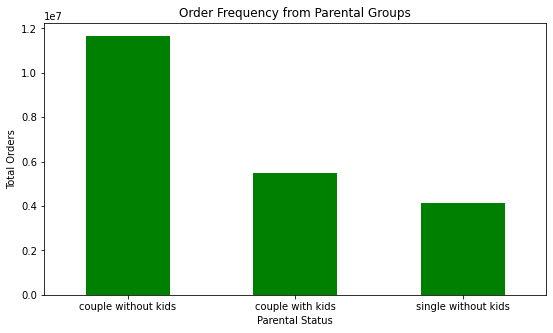

In [34]:
#Distribution of orders from customers possibly with kids, without kids or undetermined

fig_parent = df_merged_s4['parental_status'].value_counts(dropna = True).plot.bar(color = 'green', rot = 0,
                                                                    xlabel = 'Parental Status',
                                                                    ylabel = 'Total Orders',
                                                                    figsize = (9,5),
                                                                    title = "Order Frequency from Parental Groups")

### Step 7 -  Summary statistics based on usage frequency and expenditure

In [118]:
# Aggregating a customer-profile level for usage frequency and expenditure.

df_s7 = round(df_merged_s4.groupby(['high_spenders','frequent_user'])
              .agg({'order_number':['max','min','mean','median'],
                    'prices':['sum','max','min','mean','median']})
             )

In [119]:
df_s7

order_number                   \
                                             max min  mean median   
high_spenders frequent_user                                         
High spender  Frequent customer               99   5  26.0     21   
              Non-frequent customer           22   5   8.0      7   
              Regular customer                35   5  12.0     10   
Low spender   Frequent customer               99   5  25.0     20   
              Non-frequent customer           25   5   8.0      7   
              Regular customer                45   5  11.0     10   

                                          prices                         
                                             sum   max  min mean median  
high_spenders frequent_user                                              
High spender  Frequent customer        3004768.0  25.0  1.0  8.0    8.0  
              Non-frequent customer     178510.0  25.0  1.0  9.0    8.0  
              Regular customer          724780.0  25.0  1.0  8.0    8.0  
Low spender   Frequent customer      143188695.0  25.0  1.0  8.0    7.0  
              Non-frequent customer    8454911.0  25.0  1.0  8.0    7.0  
              Regular customer        34627732.0  25.0  1.0  8.0    7.0

### Step 8 + 9 - Customer profiles compared to regions and departments <br>

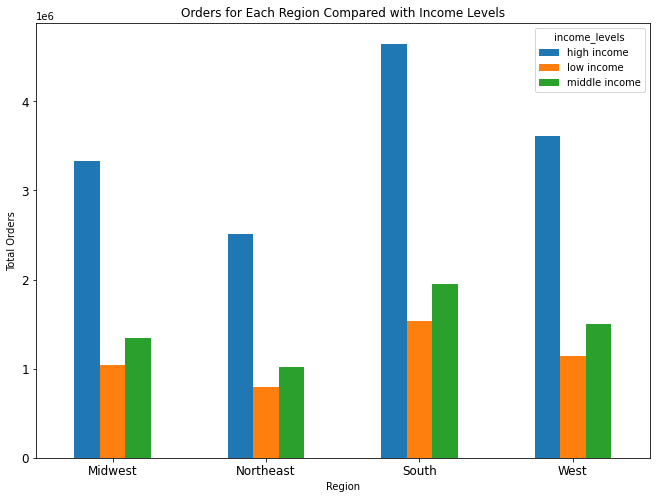

In [8]:
# orders from region compared with income levels
s8_1 = pd.crosstab(df_merged_s4['region'], df_merged_s4['income_levels'], dropna = False)

fig_s8_1 = s8_1.plot.bar(rot = 0,
                        xlabel = 'Region',
                        ylabel = 'Total Orders',
                        figsize = (11,8),
                        fontsize = 12,
                        title = "Orders for Each Region Compared with Income Levels")

<AxesSubplot:xlabel='region'>

<Figure size 1080x720 with 0 Axes>

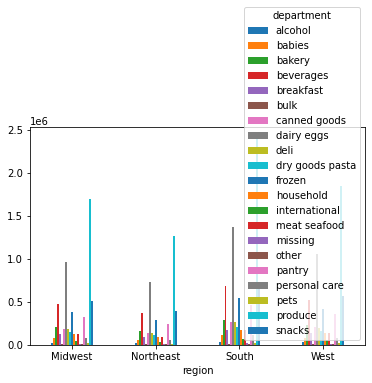

In [108]:
# s81 = pd.crosstab(df_merged_s4['region'], df_merged_s4['department'], dropna = False)
# plt.figure(figsize = (15,10))
# s81.plot.bar(rot = 0)

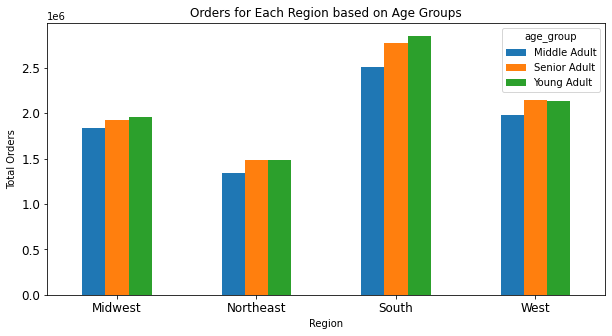

In [9]:
s8_2 = pd.crosstab(df_merged_s4['region'], df_merged_s4['age_group'], dropna = False)

fig_s8_2 = s8_2.plot.bar(rot = 0,
                        xlabel = 'Region',
                        ylabel = 'Total Orders',
                        figsize = (10,5),
                        fontsize = 12,
                        title = "Orders for Each Region based on Age Groups")

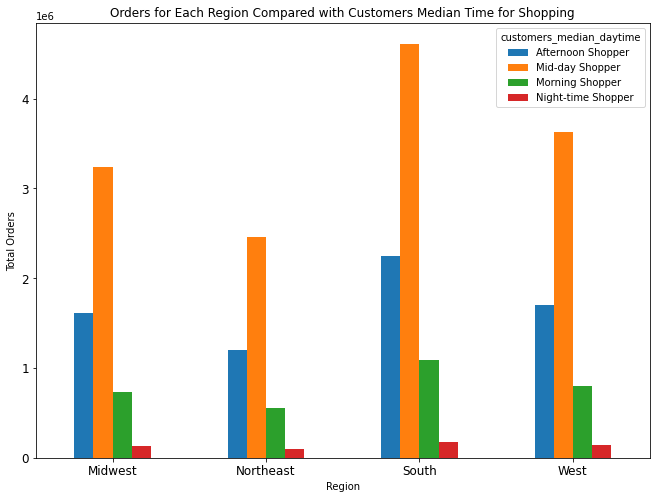

In [17]:
s8_3 = pd.crosstab(df_merged_s4['region'], df_merged_s4['customers_median_daytime'], dropna = False)

fig_s8_3 = s8_3.plot.bar(rot = 0,
                        xlabel = 'Region',
                        ylabel = 'Total Orders',
                        figsize = (11,8),
                        fontsize = 12,
                        title = "Orders for Each Region Compared with Customers Median Time for Shopping")

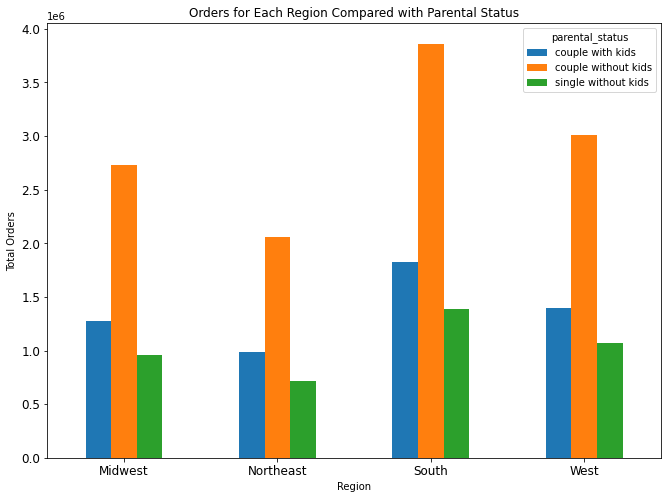

In [13]:
s8_4 = pd.crosstab(df_merged_s4['region'], df_merged_s4['parental_status'], dropna = False)

fig_s8_4 = s8_4.plot.bar(rot = 0,
                        xlabel = 'Region',
                        ylabel = 'Total Orders',
                        figsize = (11,8),
                        fontsize = 12,
                        title = "Orders for Each Region Compared with Parental Status")

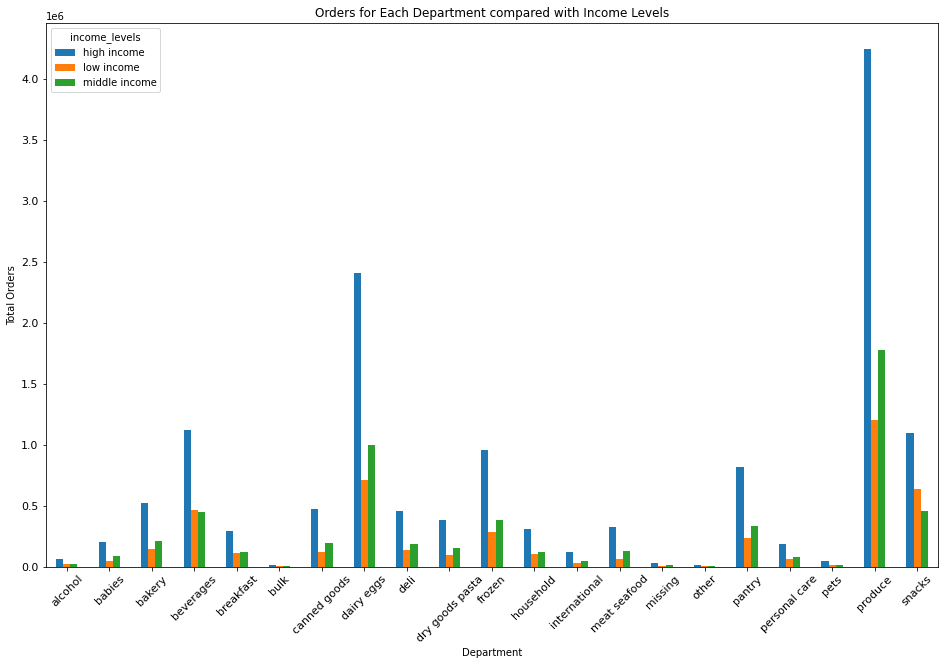

In [20]:
s8_5 = pd.crosstab(df_merged_s4['department'], df_merged_s4['income_levels'], dropna = False)


fig_s8_5 = s8_5.plot.bar(rot = 45,
                        xlabel = 'Department',
                        ylabel = 'Total Orders',
                        figsize = (16,10),
                        fontsize = 11,
                        title = "Orders for Each Department compared with Income Levels")

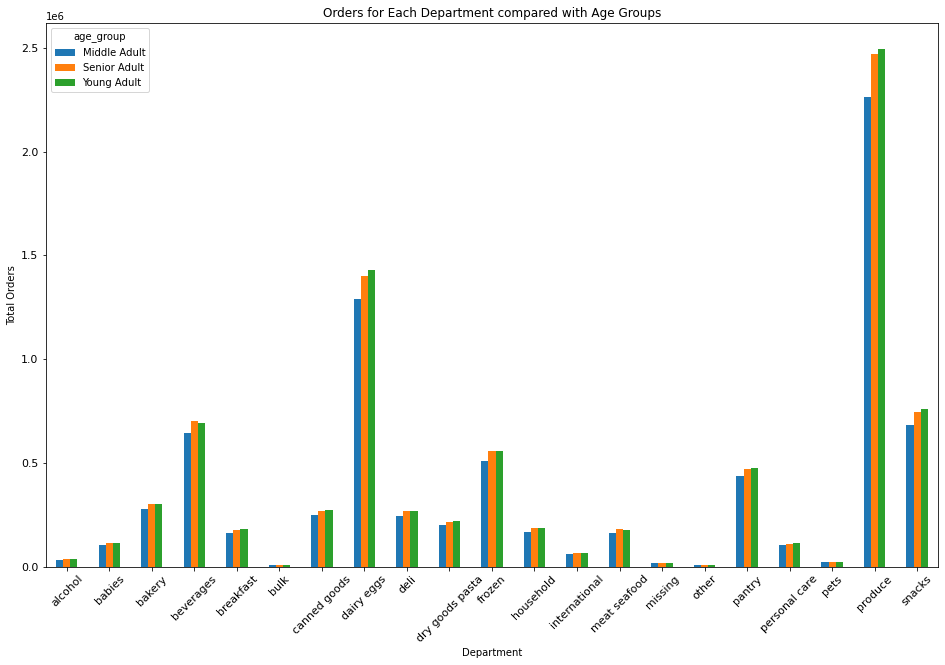

In [21]:
s8_6 = pd.crosstab(df_merged_s4['department'], df_merged_s4['age_group'], dropna = False)

fig_s8_6 = s8_6.plot.bar(rot = 45,
                        xlabel = 'Department',
                        ylabel = 'Total Orders',
                        figsize = (16,10),
                        fontsize = 11,
                        title = "Orders for Each Department compared with Age Groups")

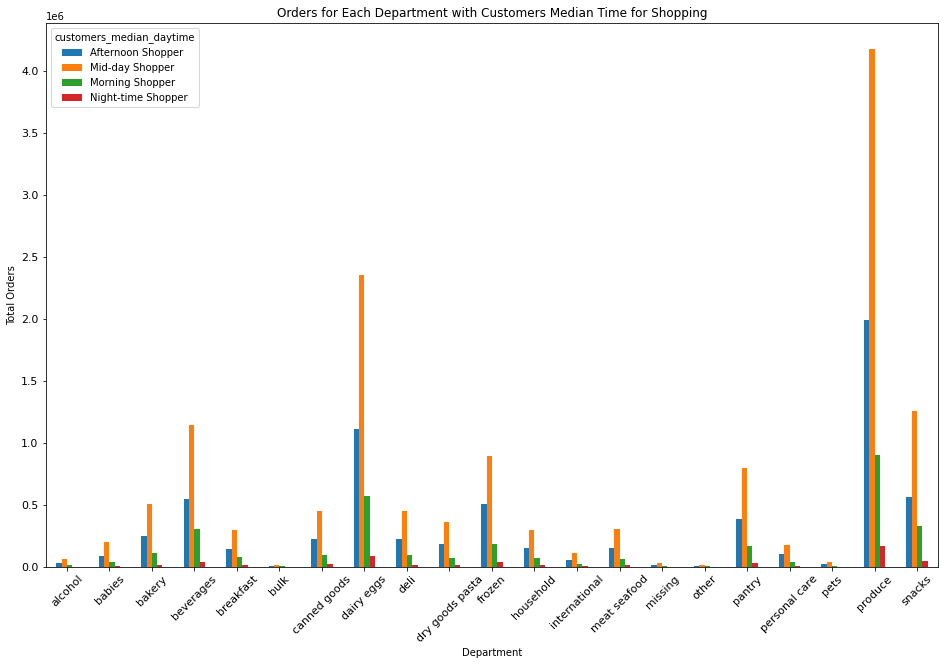

In [22]:
s8_7 = pd.crosstab(df_merged_s4['department'], df_merged_s4['customers_median_daytime'], dropna = False)

fig_s8_7 = s8_7.plot.bar(rot = 45,
                        xlabel = 'Department',
                        ylabel = 'Total Orders',
                        figsize = (16,10),
                        fontsize = 11,
                        title = "Orders for Each Department with Customers Median Time for Shopping")

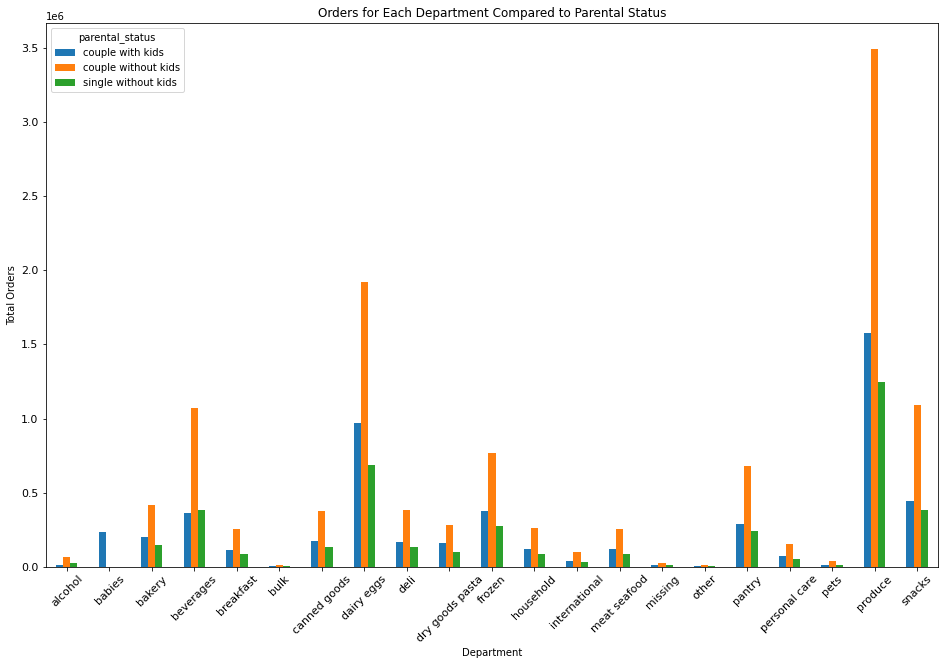

In [31]:
s8_8 = pd.crosstab(df_merged_s4['department'], df_merged_s4['parental_status'], dropna = False)

fig_s8_8 = s8_8.plot.bar(rot = 45,
                        xlabel = 'Department',
                        ylabel = 'Total Orders',
                        figsize = (16,10),
                        fontsize = 11,
                        title = "Orders for Each Department Compared to Parental Status")

### Exports

In [32]:
# export figures relevant to business questions

fig_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'fig_income.png'))
fig_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'fig_age.png'))
fig_parent.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'fig_age.png'))
fig_s8_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-region and income levels.png'))
fig_s8_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-region and age group.png'))
fig_s8_3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-region and time of daty customers.png'))
fig_s8_4.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-region and parental status.png'))
fig_s8_5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-department and income levels.png'))
fig_s8_6.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-department and age group.png'))
fig_s8_7.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-department and time of daty customers.png'))
fig_s8_8.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-department and parental status.png'))